In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib import animation
import scienceplots
plt.style.use(['science', 'notebook'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
n_particles = 16
r = torch.rand((2,n_particles)).to(device)

In [3]:
n_particles = 16
r = torch.rand((2,n_particles)).to(device)
# Color particles the start on either side
ixr = r[0]>0.5 #right
ixl = r[0]<=0.5 #left

In [4]:
ids = torch.arange(n_particles)

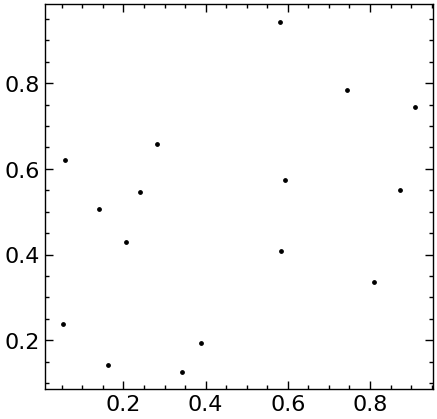

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr].cpu(),r[1][ixr].cpu(), color='black', s=6)
plt.scatter(r[0][ixl].cpu(),r[1][ixl].cpu(), color='black', s=6)

In [6]:
v = torch.zeros((2,n_particles)).to(device)
v[0][ixr] = -500
v[0][ixl] = 500

In [9]:
ids_pairs = torch.combinations(ids,2).to(device)
#ids_pairs
x_pairs = torch.stack([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
x_pairs

tensor([[0.9099, 0.0566],
        [0.9099, 0.5921],
        [0.9099, 0.3417],
        [0.9099, 0.1414],
        [0.9099, 0.3875],
        [0.9099, 0.2410],
        [0.9099, 0.7429],
        [0.9099, 0.2069],
        [0.9099, 0.5821],
        [0.9099, 0.8728],
        [0.9099, 0.1633],
        [0.9099, 0.2805],
        [0.9099, 0.5825],
        [0.9099, 0.0524],
        [0.9099, 0.8099],
        [0.0566, 0.5921],
        [0.0566, 0.3417],
        [0.0566, 0.1414],
        [0.0566, 0.3875],
        [0.0566, 0.2410],
        [0.0566, 0.7429],
        [0.0566, 0.2069],
        [0.0566, 0.5821],
        [0.0566, 0.8728],
        [0.0566, 0.1633],
        [0.0566, 0.2805],
        [0.0566, 0.5825],
        [0.0566, 0.0524],
        [0.0566, 0.8099],
        [0.5921, 0.3417],
        [0.5921, 0.1414],
        [0.5921, 0.3875],
        [0.5921, 0.2410],
        [0.5921, 0.7429],
        [0.5921, 0.2069],
        [0.5921, 0.5821],
        [0.5921, 0.8728],
        [0.5921, 0.1633],
        [0.5

In [10]:
dx_pairs = torch.diff(x_pairs, axis=1).ravel()
dx_pairs

tensor([-8.5335e-01, -3.1785e-01, -5.6821e-01, -7.6857e-01, -5.2239e-01,
        -6.6894e-01, -1.6698e-01, -7.0302e-01, -3.2788e-01, -3.7155e-02,
        -7.4666e-01, -6.2947e-01, -3.2744e-01, -8.5751e-01, -1.0006e-01,
         5.3551e-01,  2.8515e-01,  8.4786e-02,  3.3096e-01,  1.8441e-01,
         6.8637e-01,  1.5033e-01,  5.2548e-01,  8.1620e-01,  1.0670e-01,
         2.2388e-01,  5.2591e-01, -4.1597e-03,  7.5329e-01, -2.5036e-01,
        -4.5072e-01, -2.0454e-01, -3.5109e-01,  1.5087e-01, -3.8518e-01,
        -1.0027e-02,  2.8069e-01, -4.2881e-01, -3.1162e-01, -9.5966e-03,
        -5.3966e-01,  2.1779e-01, -2.0036e-01,  4.5815e-02, -1.0074e-01,
         4.0123e-01, -1.3482e-01,  2.4033e-01,  5.3105e-01, -1.7845e-01,
        -6.1265e-02,  2.4076e-01, -2.8931e-01,  4.6814e-01,  2.4618e-01,
         9.9625e-02,  6.0159e-01,  6.5543e-02,  4.4069e-01,  7.3141e-01,
         2.1911e-02,  1.3910e-01,  4.4112e-01, -8.8946e-02,  6.6851e-01,
        -1.4655e-01,  3.5541e-01, -1.8063e-01,  1.9

In [11]:
x_pairs = torch.stack([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
y_pairs = torch.stack([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T
dx_pairs = torch.diff(x_pairs, axis=1).ravel()
dy_pairs = torch.diff(y_pairs, axis=1).ravel()
d_pairs = torch.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

tensor([0.8621, 0.3599, 0.8388, 0.8045, 0.7591, 0.6975, 0.1720, 0.7706, 0.3840,
        0.1959, 0.9581, 0.6351, 0.4685, 0.9950, 0.4193, 0.5375, 0.5707, 0.1431,
        0.5411, 0.1990, 0.7057, 0.2445, 0.6166, 0.8192, 0.4895, 0.2271, 0.5672,
        0.3821, 0.8052, 0.5134, 0.4560, 0.4333, 0.3523, 0.2586, 0.4121, 0.3689,
        0.2817, 0.6084, 0.3228, 0.1665, 0.6357, 0.3229, 0.4288, 0.0805, 0.4315,
        0.7709, 0.3303, 0.8516, 0.6800, 0.1792, 0.5359, 0.3708, 0.3103, 0.5130,
        0.3981, 0.1075, 0.6632, 0.1016, 0.6212, 0.7328, 0.3632, 0.2069, 0.4517,
        0.2813, 0.6896, 0.3825, 0.6905, 0.2967, 0.7755, 0.6033, 0.2297, 0.4783,
        0.2908, 0.3383, 0.4461, 0.5558, 0.1228, 0.5237, 0.6318, 0.4104, 0.1195,
        0.3682, 0.3605, 0.6063, 0.6439, 0.2260, 0.2672, 0.8647, 0.4793, 0.4090,
        0.8803, 0.4534, 0.6375, 0.6772, 0.2883, 0.2422, 0.3761, 0.2443, 0.6099,
        0.4883, 0.9033, 0.4147, 0.5350, 0.8815, 0.6485, 0.8185, 0.6020, 0.3235,
        0.8778, 0.2239, 0.5289, 0.4961, 

In [12]:
radius = 0.06
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

tensor([[ 3,  5],
        [ 4,  6],
        [ 4,  8],
        [ 6, 12]])

In [13]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

In [14]:
v1new = v1 - torch.sum((v1-v2)*(r1-r2), axis=0)/torch.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - torch.sum((v1-v2)*(r1-r2), axis=0)/torch.sum((r2-r1)**2, axis=0) * (r2-r1)

In [15]:
def get_deltad2_pairs(r, ids_pairs):
    dx = torch.diff(torch.stack([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T).squeeze()
    dy = torch.diff(torch.stack([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T).squeeze()
    return dx**2 + dy**2

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - torch.sum((v1-v2)*(r1-r2), axis=0)/torch.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - torch.sum((v1-v2)*(r1-r2), axis=0)/torch.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = torch.zeros((ts, r.shape[0], r.shape[1])).to(device)
    vs = torch.zeros((ts, v.shape[0], v.shape[1])).to(device)
    # Initial State
    rs[0] = r
    vs[0] = v
    for i in range(1,ts):
        ic = id_pairs[get_deltad2_pairs(r, ids_pairs) < d_cutoff**2]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -torch.abs(v[0,r[0]>1])
        v[0,r[0]<0] = torch.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -torch.abs(v[1,r[1]>1])
        v[1,r[1]<0] = torch.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r
        vs[i] = v
    return rs, vs

In [16]:
radius = 0.03
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

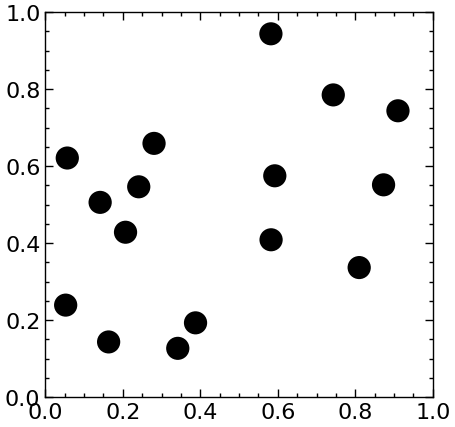

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='black')
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='black')
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

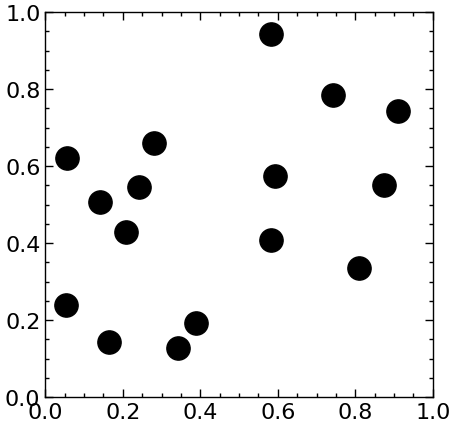

In [18]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.clear()
vmin = 0
vmax = 1
ax.set_xlim(0,1)
ax.set_ylim(0,1)
markersize = 2 * radius * ax.get_window_extent().width  / (vmax-vmin) * 72./fig.dpi
red, = ax.plot([], [], 'o', color='black', markersize=markersize)
blue, = ax.plot([], [], 'o', color='black', markersize=markersize)

def animate(i):
    xred, yred = rs[i][0][ixr].cpu(), rs[i][1][ixr].cpu()
    xblue, yblue = rs[i][0][ixl].cpu(),rs[i][1][ixl].cpu()
    red.set_data(xred, yred)
    blue.set_data(xblue, yblue)
    return red, blue

writer = animation.FFMpegWriter(fps=30)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)
 #ani.save('ani3.mp4',writer=writer,dpi=100)

In [19]:
n_particles = 5000
r = torch.rand((2,n_particles)).to(device)
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = torch.arange(n_particles)
ids_pairs = torch.combinations(ids,2).to(device)
v = torch.zeros((2,n_particles)).to(device)
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0005
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

In [20]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Text(0, 0.5, '# Particles')

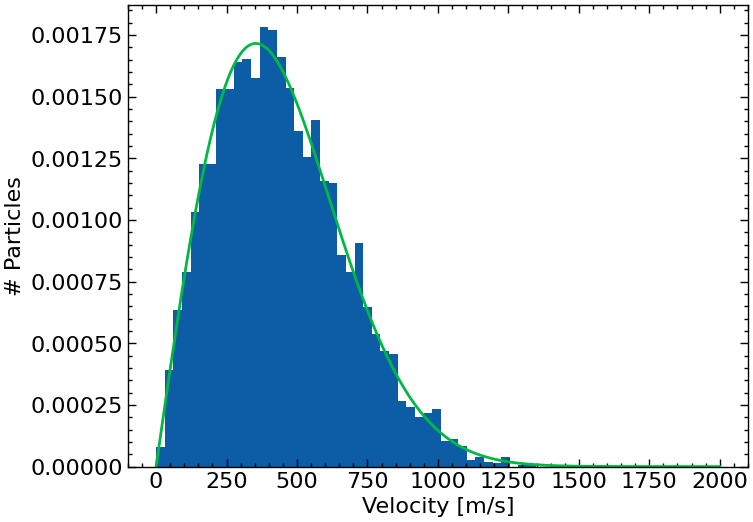

In [21]:
bins = np.linspace(0,1500,50)
plt.figure()
plt.hist(torch.sqrt(torch.sum(vs[-1]**2, axis=0)).cpu(), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

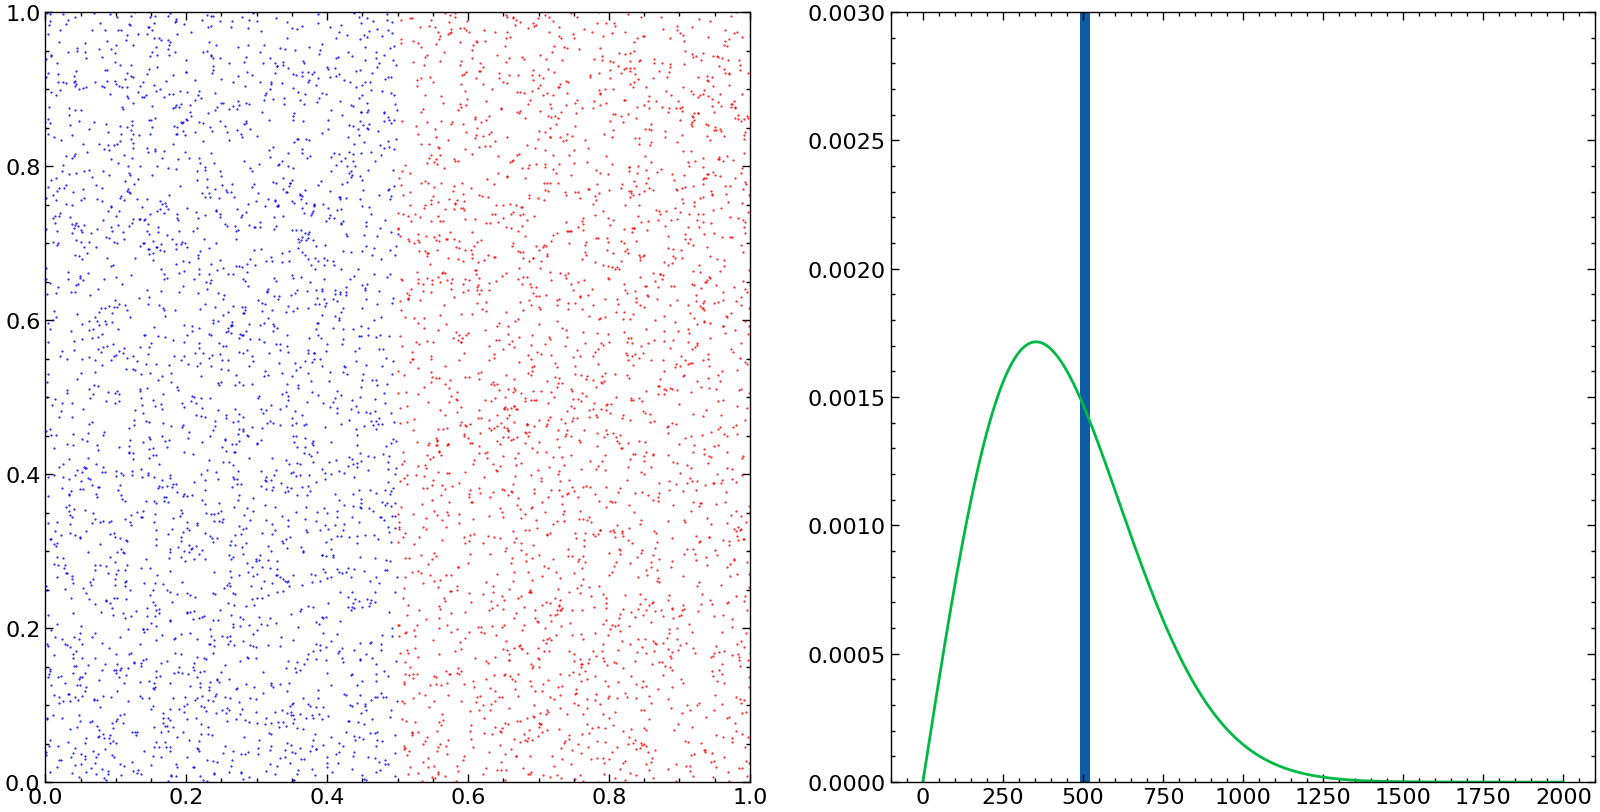

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].clear()
vmin = 0
vmax = 1
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1)
markersize = 2 * radius * axes[0].get_window_extent().width  / (vmax-vmin) * 72./fig.dpi
red, = axes[0].plot([], [], 'o', color='red', markersize=markersize)
blue, = axes[0].plot([], [], 'o', color='blue', markersize=markersize)
n, bins, patches = axes[1].hist(torch.sqrt(torch.sum(vs[0]**2, axis=0)).cpu(), bins=bins, density=True)
axes[1].plot(v,fv)
axes[1].set_ylim(top=0.003)

def animate(i):
    xred, yred = rs[i][0][ixr].cpu(), rs[i][1][ixr].cpu()
    xblue, yblue = rs[i][0][ixl].cpu(),rs[i][1][ixl].cpu()
    red.set_data(xred, yred)
    blue.set_data(xblue, yblue)
    hist, _ = np.histogram(torch.sqrt(torch.sum(vs[i]**2, axis=0)).cpu(), bins=bins, density=True)
    for i, patch in enumerate(patches):
        patch.set_height(hist[i])
    return red, blue

writer = animation.FFMpegWriter(fps=30)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)
#ani.save('ani_gpu_10000.mp4',writer=writer,dpi=100)
ani.save('C:/Users/jet95/OneDrive/Bureau/Heidel/GNNFS/GNN/ani_gpu_10000.mp4', writer=writer, dpi=100)
